Implementing k-Means to get a better picture of how the algorithm works. Using data generated from normal distributions as input data.(Out of Class Exercise)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

#Input data (Trivial) 
'''
training_data = np.matrix([[0,0],[0,0.25],[0,0.5],[0,0.75],[0,1],
                           [0.1,0],[0.1,0.25],[0.1,0.5],[0.1,0.75],[0.1,1],
                           [-3,1],[-2.75,1],[-2.5,1],[-2.25,1],[-2,1],
                           [-3,1.1],[-2.75,1.1],[-2.5,1.1],[-2.25,1.1],[-2,1.1],
                           [-1,-3],[-1,-3.25],[-1,-3.5],[-1,-3.75],[-1,-4],
                           [-1.1,-3],[-1.1,-3.25],[-1.1,-3.5],[-1.1,-3.75],[-1.1,-4]])
'''

#Training Data (Normal Distribution)
training_data = np.zeros((999,2))

for i in range(333):
    training_data[i] = np.random.normal([-4,2],1.5)
    training_data[i+333] = np.random.normal([5,3],1.5)
    training_data[i+666] = np.random.normal([0,-6],[2,1])

k = 3 #Number of Clusters
n = len(training_data) #Number of data samples
m = 2 #Dimenstionalilty of Data

In [2]:
mean = np.zeros((k,1,m))
cluster = np.zeros((n))
population = np.zeros((k))
for j in range(n):
        cluster[j] = np.random.randint(0,k) #Random Initialization of Clusters

In [3]:
change = True #Variable to test whether change in clusters occured
num_of_iter = 0 #Measure of how many iterations until convergence

while change:
    change = False #Reset change in cluster variable
    for j in range(n):
        population[int(cluster[j])]+=1 #Calculate number of data samples in each cluster
    for j in range(n):
        mean[int(cluster[j])]+=training_data[j] #Calculate sum of all data samples of each cluster
    for j in range(k):
        mean[j]/=population[j] #Divide each sum by the population of each cluster to get the mean of each cluster
    
    #For all data samples, change cluster to the cluster with the nearest mean
    for j in range(n):
        for m in range(k):
            if m != int(cluster[j]):
                if np.linalg.norm(training_data[j]-mean[m]) < np.linalg.norm(training_data[j]-mean[int(cluster[j])]):
                    cluster[j] = m #Change cluster of data sample j to cluster m
                    change = True #Change in clusters occured
    num_of_iter += 1

print("k-means converged after ", num_of_iter, "iterations")

k-means converged after  5 iterations


[]

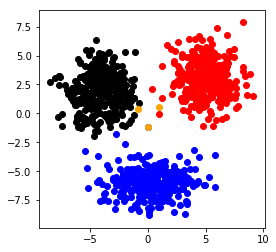

In [4]:
#Plotting data for 3 clusters
for z in range(n):
    if cluster[z] == 0:
        plt.scatter(training_data[z,0], training_data[z,1], c="black")    
    elif cluster[z] == 1:
        plt.scatter(training_data[z,0], training_data[z,1], c="blue")
    elif cluster[z] == 2:
        plt.scatter(training_data[z,0], training_data[z,1], c="red")
for y in range(k):
    plt.scatter(mean[y,0][0], mean[y,0][1], c="orange")
plt.gca().set_aspect('equal', adjustable='box')
plt.plot() 